<a href="https://colab.research.google.com/github/Sunnyconsultant/Sunnyconsultant/blob/main/Yolov5_for_PCB%E8%BE%A8%E8%AD%98__public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 載入PCB資料庫


把Kaggle上的PCB資料archive.zip下載到自己的Google drive

PCB defects：https://www.kaggle.com/datasets/akhatova/pcb-defects




In [2]:
from google.colab import drive
import zipfile
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_file_path = '/content/drive/My Drive/Colab Notebooks/PCB-archive.zip'
extracted_folder_path = '/content/PCB data'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

print(f'ZIP 文件已成功解压缩到 "{extracted_folder_path}" 目录下。')


確認PCB data/PCB_DATASET底下的資料有那些項目 (確認解壓縮是否正確)

In [ ]:
import os
directory_path = '/content/PCB data/PCB_DATASET'
file_list = os.listdir(directory_path)

print("Files in directory:")
for file_name in file_list:
    print(file_name)

# 資料前處理



先確認JPG數量

In [ ]:
import os

base_path = '/content/PCB data/PCB_DATASET/images'
folders = ['Spurious_copper', 'Mouse_bite', 'Open_circuit', 'Missing_hole', 'Spur', 'Short']

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    jpg_count = len([f for f in os.listdir(folder_path) if f.endswith('.jpg')])
    print(f"{folder}: {jpg_count} JPG files")

Spurious_copper: 116 JPG files
Mouse_bite: 115 JPG files
Open_circuit: 116 JPG files
Missing_hole: 115 JPG files
Spur: 115 JPG files
Short: 116 JPG files


確認XML檔數量

In [ ]:
import os
xml_folder_path = "/content/PCB data/PCB_DATASET/Annotations/"

xml_files = []
for folder in ['Spurious_copper', 'Mouse_bite', 'Open_circuit', 'Missing_hole', 'Spur', 'Short']:
    folder_path = os.path.join(xml_folder_path, folder)
    if os.path.isdir(folder_path):
        xml_files.extend([os.path.join(folder, f) for f in os.listdir(folder_path) if f.endswith('.xml')])

num_files = len(xml_files)
print(f"總共有 {num_files} 個XML檔案")

for folder in ['Spurious_copper', 'Mouse_bite', 'Open_circuit', 'Missing_hole', 'Spur', 'Short']:
    folder_path = os.path.join(xml_folder_path, folder)
    num_files_in_folder = len([f for f in os.listdir(folder_path) if f.endswith('.xml')])
    print(f"{folder} 資料夾中有 {num_files_in_folder} 個XML檔案")

總共有 693 個XML檔案
Spurious_copper 資料夾中有 116 個XML檔案
Mouse_bite 資料夾中有 115 個XML檔案
Open_circuit 資料夾中有 116 個XML檔案
Missing_hole 資料夾中有 115 個XML檔案
Spur 資料夾中有 115 個XML檔案
Short 資料夾中有 116 個XML檔案


In [ ]:
!pip install Pillow

from PIL import Image
import os

original_folder = '/content/PCB data/PCB_DATASET/images'
resized_folder = '/content/PCB_resized'
os.makedirs(resized_folder, exist_ok=True)
folders = ['Spurious_copper', 'Mouse_bite', 'Open_circuit', 'Missing_hole', 'Spur', 'Short']

for folder in folders:
    folder_path = os.path.join(original_folder, folder)
    images = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    os.makedirs(resized_folder, exist_ok=True)
    for image in images:
        image_path = os.path.join(folder_path, image)
        img = Image.open(image_path)
        resized_img = img.resize((640, 640))
        output_path = os.path.join(resized_folder, image)
        resized_img.save(output_path)
        print(f"已處理: {image}, 新檔案儲存在: {output_path}")
print("完成圖片大小調整並儲存到新的資料夾。")

已處理: 07_spurious_copper_10.jpg, 新檔案儲存在: /content/PCB_resized/07_spurious_copper_10.jpg
已處理: 01_spurious_copper_19.jpg, 新檔案儲存在: /content/PCB_resized/01_spurious_copper_19.jpg
已處理: 01_spurious_copper_14.jpg, 新檔案儲存在: /content/PCB_resized/01_spurious_copper_14.jpg
已處理: 06_spurious_copper_08.jpg, 新檔案儲存在: /content/PCB_resized/06_spurious_copper_08.jpg
已處理: 08_spurious_copper_05.jpg, 新檔案儲存在: /content/PCB_resized/08_spurious_copper_05.jpg
已處理: 01_spurious_copper_17.jpg, 新檔案儲存在: /content/PCB_resized/01_spurious_copper_17.jpg
已處理: 11_spurious_copper_06.jpg, 新檔案儲存在: /content/PCB_resized/11_spurious_copper_06.jpg
已處理: 12_spurious_copper_06.jpg, 新檔案儲存在: /content/PCB_resized/12_spurious_copper_06.jpg
已處理: 09_spurious_copper_05.jpg, 新檔案儲存在: /content/PCB_resized/09_spurious_copper_05.jpg
已處理: 10_spurious_copper_01.jpg, 新檔案儲存在: /content/PCB_resized/10_spurious_copper_01.jpg
已處理: 11_spurious_copper_10.jpg, 新檔案儲存在: /content/PCB_resized/11_spurious_copper_10.jpg
已處理: 09_spurious_copper_08.jpg, 新檔案儲存在: /co

In [ ]:
import os
import xml.etree.ElementTree as ET
from tqdm import tqdm

def resize_xml(xml_path, output_path, target_size):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    for size in root.iter('size'):
        width = int(size.find('width').text)
        height = int(size.find('height').text)

        size.find('width').text = str(target_size)
        size.find('height').text = str(target_size)

    for obj in root.iter('object'):
        for box in obj.iter('bndbox'):
            xmin = int(box.find('xmin').text)
            ymin = int(box.find('ymin').text)
            xmax = int(box.find('xmax').text)
            ymax = int(box.find('ymax').text)

            xmin = int(xmin * target_size / width)
            ymin = int(ymin * target_size / height)
            xmax = int(xmax * target_size / width)
            ymax = int(ymax * target_size / height)

            box.find('xmin').text = str(xmin)
            box.find('ymin').text = str(ymin)
            box.find('xmax').text = str(xmax)
            box.find('ymax').text = str(ymax)

    tree.write(output_path)

original_annotations_folder = '/content/PCB data/PCB_DATASET/Annotations'
resized_annotations_folder = '/content/PCB_resized'
os.makedirs(resized_annotations_folder, exist_ok=True)

target_size = 640
for folder in folders:
    folder_path = os.path.join(original_annotations_folder, folder)

    xml_files = [f for f in os.listdir(folder_path) if f.endswith('.xml')]
    for xml_file in xml_files:
        xml_path = os.path.join(folder_path, xml_file)

        base_filename = os.path.splitext(xml_file)[0]
        output_xml_path = os.path.join(resized_annotations_folder, f"{base_filename}.xml")
        resize_xml(xml_path, output_xml_path, target_size)

        print(f"已處理: {xml_file}, 新檔案儲存在: {output_xml_path}")

print("完成 XML 檔案大小調整並儲存到新的資料夾。")


已處理: 10_spurious_copper_03.xml, 新檔案儲存在: /content/PCB_resized/10_spurious_copper_03.xml
已處理: 09_spurious_copper_09.xml, 新檔案儲存在: /content/PCB_resized/09_spurious_copper_09.xml
已處理: 04_spurious_copper_13.xml, 新檔案儲存在: /content/PCB_resized/04_spurious_copper_13.xml
已處理: 09_spurious_copper_06.xml, 新檔案儲存在: /content/PCB_resized/09_spurious_copper_06.xml
已處理: 05_spurious_copper_08.xml, 新檔案儲存在: /content/PCB_resized/05_spurious_copper_08.xml
已處理: 11_spurious_copper_06.xml, 新檔案儲存在: /content/PCB_resized/11_spurious_copper_06.xml
已處理: 04_spurious_copper_11.xml, 新檔案儲存在: /content/PCB_resized/04_spurious_copper_11.xml
已處理: 01_spurious_copper_10.xml, 新檔案儲存在: /content/PCB_resized/01_spurious_copper_10.xml
已處理: 05_spurious_copper_04.xml, 新檔案儲存在: /content/PCB_resized/05_spurious_copper_04.xml
已處理: 04_spurious_copper_14.xml, 新檔案儲存在: /content/PCB_resized/04_spurious_copper_14.xml
已處理: 01_spurious_copper_08.xml, 新檔案儲存在: /content/PCB_resized/01_spurious_copper_08.xml
已處理: 12_spurious_copper_04.xml, 新檔案儲存在: /co

# 生成train, val訓練集和label

In [ ]:
import os
import random
from shutil import copyfile

source_folder = '/content/PCB_resized'

output_folder = '/content/PCB_split'
os.makedirs(output_folder, exist_ok=True)

train_ratio = 0.8
val_ratio = 0.2

for subset in ['train', 'val']:
    os.makedirs(os.path.join(output_folder, subset), exist_ok=True)

for xml_file in os.listdir(source_folder):
    if xml_file.endswith('.xml'):
        base_filename = os.path.splitext(xml_file)[0]

        rand_num = random.random()
        if rand_num < train_ratio:
            subset_folder = 'train'
        else:
            subset_folder = 'val'

        src_xml = os.path.join(source_folder, xml_file)
        dest_xml = os.path.join(output_folder, subset_folder, f'{base_filename}.xml')
        copyfile(src_xml, dest_xml)

        jpg_file = f'{base_filename}.jpg'
        src_jpg = os.path.join(source_folder, jpg_file)
        dest_jpg = os.path.join(output_folder, subset_folder, jpg_file)
        copyfile(src_jpg, dest_jpg)

In [ ]:
import os
import xml.etree.ElementTree as ET
from PIL import Image

def convert_xml_to_yolo(xml_path, image_width, image_height, class_mapping):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    labels = []
    for obj in root.findall('object'):
        class_name = obj.find('name').text
        if class_name not in class_mapping:
            continue

        class_id = class_mapping[class_name]
        bbox = obj.find('bndbox')

        x_center = (float(bbox.find('xmin').text) + float(bbox.find('xmax').text)) / 2.0 / image_width
        y_center = (float(bbox.find('ymin').text) + float(bbox.find('ymax').text)) / 2.0 / image_height
        width = (float(bbox.find('xmax').text) - float(bbox.find('xmin').text)) / image_width
        height = (float(bbox.find('ymax').text) - float(bbox.find('ymin').text)) / image_height

        labels.append(f"{class_id} {x_center} {y_center} {width} {height}")

    return labels

def create_yolo_labels(source_folder, output_folder, class_mapping):
    for xml_file in os.listdir(source_folder):
        if xml_file.endswith('.xml'):
            xml_path = os.path.join(source_folder, xml_file)

            image_file = os.path.splitext(xml_file)[0] + '.jpg'
            image_path = os.path.join(source_folder.replace('Annotations', 'JPEGImages'), image_file)
            img = Image.open(image_path)
            image_width, image_height = img.size

            labels = convert_xml_to_yolo(xml_path, image_width, image_height, class_mapping)

            output_path = os.path.join(output_folder, os.path.splitext(xml_file)[0] + '.txt')
            with open(output_path, 'w') as f:
                f.write('\n'.join(labels))

class_mapping = {'spurious_copper': 0, 'mouse_bite': 1, 'open_circuit': 2, 'missing_hole': 3, 'spur': 4, 'short': 5}

create_yolo_labels('/content/PCB_split/train', '/content/PCB_split/train', class_mapping)
create_yolo_labels('/content/PCB_split/val', '/content/PCB_split/val', class_mapping)


可視化檢查

Randomly selected image: 05_spur_08.jpg


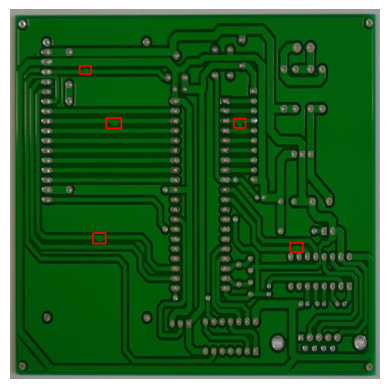

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import random

def visualize_random_image_with_labels(images_folder, labels_folder):
    image_files = [f for f in os.listdir(images_folder) if f.endswith('.jpg')]

    random_image_file = random.choice(image_files)
    print("Randomly selected image:", random_image_file)

    image_path = os.path.join(images_folder, random_image_file)

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    label_file = os.path.splitext(random_image_file)[0] + '.txt'
    label_path = os.path.join(labels_folder, label_file)

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()

        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center, y_center, width, height = map(float, parts[1:])

            img_height, img_width, _ = image.shape
            x, y, w, h = map(int, [x_center * img_width, y_center * img_height, width * img_width, height * img_height])
            x1, y1, x2, y2 = x - w//2, y - h//2, x + w//2, y + h//2
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

train_folder = '/content/PCB_split/train'
labels_folder = '/content/PCB_split/train'

visualize_random_image_with_labels(train_folder, labels_folder)

# YOLOv5s model

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # Clone the YOLOv5 repository
%cd yolov5
!pip install -U -r requirements.txt  # Install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 16413, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 16413 (delta 0), reused 3 (delta 0), pack-reused 16408
Receiving objects: 100% (16413/16413), 14.96 MiB | 18.28 MiB/s, done.
Resolving deltas: 100% (11263/11263), done.
/content/yolov5/yolov5


In [ ]:
data_yaml_content = """

train: /content/PCB_split/train
val: /content/PCB_split/val
nc: 6
names: ['spurious_copper', 'mouse_bite', 'open_circuit', 'missing_hole', 'spur', 'short']
"""

with open('/content/yolov5/data/data.yaml', 'w') as f:
    f.write(data_yaml_content)

In [ ]:
!python train.py --img-size 640 --batch-size 16 --epochs 100 --data /content/yolov5/data/data.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --name my_experiment --save-period 1 --project /content/yolov5/runs/

2024-02-21 16:09:53.709089: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-21 16:09:53.709155: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-21 16:09:53.711336: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=/content/yolov5/data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, m

# 畫分析圖

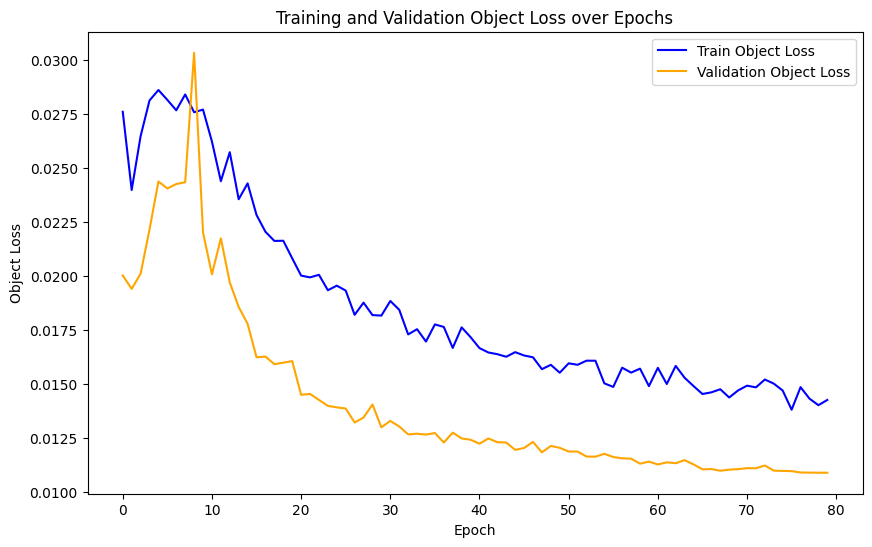

In [ ]:
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

results_path = '/content/yolov5/runs/my_experiment/results.csv'
df = pd.read_csv(results_path)

df.columns = df.columns.str.strip()

epochs = df['epoch']
train_box_loss = df['train/obj_loss']
val_box_loss = df['val/obj_loss']

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_box_loss, label='Train Object Loss', color='blue')
plt.plot(epochs, val_box_loss, label='Validation Object Loss', color='orange')

plt.title('Training and Validation Object Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Object Loss')

plt.legend()
plt.show()


# 製作test資料

In [ ]:
import os
import shutil

source_folder = '/content/PCB data/PCB_DATASET/rotation'
target_folder = '/content/rotation_test'

os.makedirs(target_folder, exist_ok=True)

subfolders = ['Spurious_copper_rotation', 'Mouse_bite_rotation', 'Open_circuit_rotation', 'Missing_hole_rotation']
for subfolder in subfolders:
    subfolder_path = os.path.join(source_folder, subfolder)

    for filename in os.listdir(subfolder_path):
        if filename.endswith('.jpg'):
            source_filepath = os.path.join(subfolder_path, filename)
            target_filepath = os.path.join(target_folder, filename)
            shutil.copy2(source_filepath, target_filepath)

print("檔案複製完成！")


檔案複製完成！


In [ ]:
from PIL import Image
import os

source_folder = '/content/rotation_test'
target_folder = '/content/rotation_test_resized'

os.makedirs(target_folder, exist_ok=True)

for filename in os.listdir(source_folder):
    if filename.endswith('.jpg'):
        source_filepath = os.path.join(source_folder, filename)
        img = Image.open(source_filepath)
        img_resized = img.resize((640, 640))

        target_filepath = os.path.join(target_folder, filename)
        img_resized.save(target_filepath)

print("檔案調整大小完成！")


檔案調整大小完成！


# 將/content/rotation_test_resized裡的JPG送到之前的模型做測試

送入之前的模型訓練-->用best.pt

In [ ]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/my_experiment/weights/best.pt --img-size 640 --conf 0.5 --source /content/rotation_test_resized --save-txt --save-conf --project /content/yolov5/runs/detect/

detect: weights=['/content/yolov5/runs/my_experiment/weights/best.pt'], source=/content/rotation_test_resized, data=../data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/yolov5/runs/detect/, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.10.12 torch-2.2.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/462 /content/rotation_test_resized/01_missing_hole_01.jpg: 640x640 3 missing_holes, 11.6ms
image 2/462 /content/rotation_test_resized/01_missing_hole_02.jpg: 640x640 3 missing_holes, 11.7ms
image 3/462 /content/rotation_test_resi

隨機畫出模型辨識後的test圖片結果

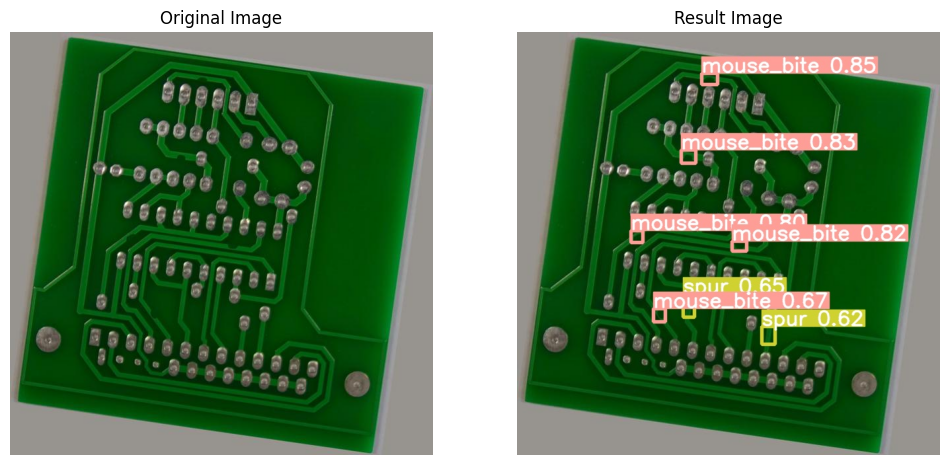

檔案名稱: 11_mouse_bite_05.jpg
類別: 0, 位置: [0.72, 0.03, 0.04, 0.62]
類別: 0, 位置: [0.65, 0.03, 0.05, 0.65]
類別: 0, 位置: [0.67, 0.03, 0.03, 0.67]
類別: 0, 位置: [0.48, 0.03, 0.03, 0.80]
類別: 0, 位置: [0.51, 0.03, 0.02, 0.82]
類別: 0, 位置: [0.29, 0.03, 0.03, 0.83]
類別: 0, 位置: [0.11, 0.04, 0.03, 0.85]


In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

original_folder = '/content/rotation_test_resized'
result_folder = '/content/yolov5/runs/detect/exp'

original_files = [f for f in os.listdir(original_folder) if f.endswith('.jpg')]

selected_file = random.choice(original_files)
selected_original_filepath = os.path.join(original_folder, selected_file)

original_img = Image.open(selected_original_filepath)
result_file = os.path.join(result_folder, selected_file)
result_img = Image.open(result_file)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original_img)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(result_img)
axes[1].set_title('Result Image')
axes[1].axis('off')
plt.show()
print("檔案名稱:", selected_file)

label_filepath = os.path.join(result_folder, 'labels', os.path.splitext(selected_file)[0] + '.txt')
if os.path.exists(label_filepath):
    with open(label_filepath, 'r') as file:
        for line in file:
            class_id, x_center, y_center, width, height = map(float, line.split()[1:])
            print(f"類別: {int(class_id)}, 位置: [{x_center:.2f}, {y_center:.2f}, {width:.2f}, {height:.2f}]")
else:
    print(f"未找到標籤檔案 {label_filepath}")
